## Reading the CSV


In [ ]:
df <- read.csv("/content/cleaned_investments_VC.csv")

In [ ]:
head(df)

,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,founded_month,founded_quarter,⋯,round_B,round_C,round_D,round_E,round_F,round_G,round_H,country,age,success_metric_updated
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,#waywire,News,1750000,acquired,New York City,New York,1,2012-06-01,2012-06,2012-Q2,⋯,0,0,0,0,0,0,0,United States,2,Successful
2,'Rock' Your Paper,Publishing,40000,operating,Tallinn,Tallinn,1,2012-10-26,2012-10,2012-Q4,⋯,0,0,0,0,0,0,0,Estonia,2,Potentially Successful
3,(In)Touch Network,Electronics,1500000,operating,London,London,1,2011-04-01,2011-04,2011-Q2,⋯,0,0,0,0,0,0,0,United Kingdom,3,Potentially Successful
4,-R- Ranch and Mine,Tourism,60000,operating,Dallas,Fort Worth,2,2014-01-01,2014-01,2014-Q1,⋯,0,0,0,0,0,0,0,United States,0,Potentially Successful
5,004 Technologies,Software,0,operating,"Springfield, Illinois",Champaign,1,2010-01-01,2010-01,2010-Q1,⋯,0,0,0,0,0,0,0,United States,4,Potentially Successful
6,"1,2,3 Listo",E-Commerce,40000,operating,Santiago,Las Condes,1,2012-01-01,2012-01,2012-Q1,⋯,0,0,0,0,0,0,0,Chile,2,Potentially Successful


In [ ]:
nrow(df)

[1] 32765

# Country level analysis


## Data Manipulation


In [ ]:
library(tidyverse)
top_5_countries <- df %>%
  count(country, sort = TRUE) %>%
  head(5) %>%
  pull(country)

df$country[!(df$country %in% top_5_countries)] <- "Others"
head(df)


,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,founded_month,founded_quarter,⋯,round_B,round_C,round_D,round_E,round_F,round_G,round_H,country,age,success_metric_updated
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,#waywire,News,1750000,acquired,New York City,New York,1,2012-06-01,2012-06,2012-Q2,⋯,0,0,0,0,0,0,0,United States,2,Successful
2,'Rock' Your Paper,Publishing,40000,operating,Tallinn,Tallinn,1,2012-10-26,2012-10,2012-Q4,⋯,0,0,0,0,0,0,0,Others,2,Potentially Successful
3,(In)Touch Network,Electronics,1500000,operating,London,London,1,2011-04-01,2011-04,2011-Q2,⋯,0,0,0,0,0,0,0,United Kingdom,3,Potentially Successful
4,-R- Ranch and Mine,Tourism,60000,operating,Dallas,Fort Worth,2,2014-01-01,2014-01,2014-Q1,⋯,0,0,0,0,0,0,0,United States,0,Potentially Successful
5,004 Technologies,Software,0,operating,"Springfield, Illinois",Champaign,1,2010-01-01,2010-01,2010-Q1,⋯,0,0,0,0,0,0,0,United States,4,Potentially Successful
6,"1,2,3 Listo",E-Commerce,40000,operating,Santiago,Las Condes,1,2012-01-01,2012-01,2012-Q1,⋯,0,0,0,0,0,0,0,Others,2,Potentially Successful


## Visualising success status proportion (as percentage) for countries


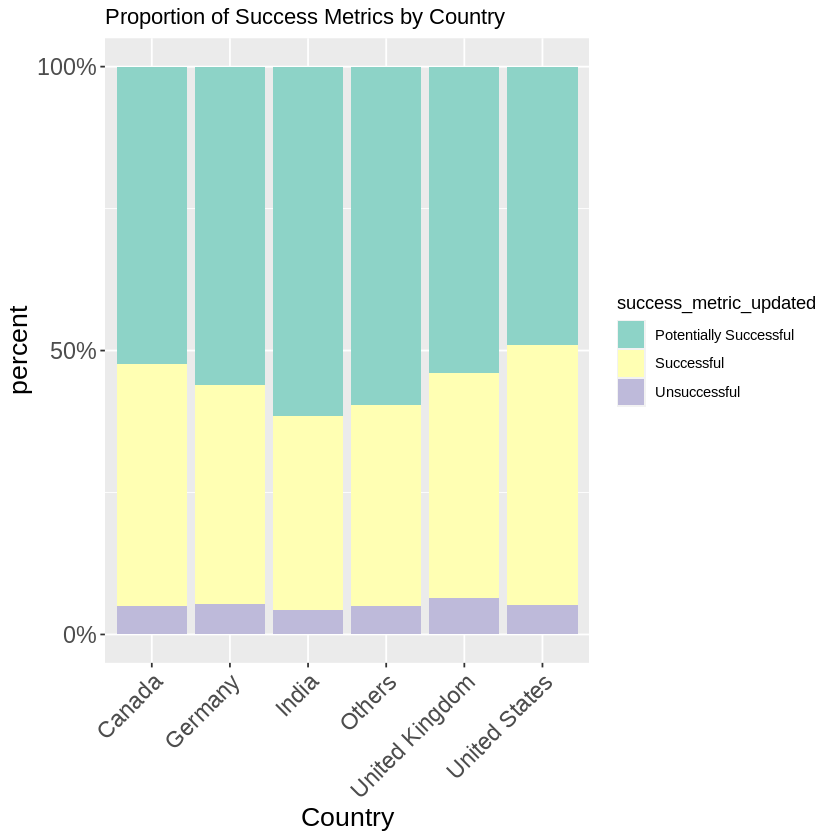

In [ ]:
library(ggplot2)

ggplot(df, aes(x = country, fill = success_metric_updated)) +
  geom_bar(stat = "count", position = "fill") +
  scale_fill_brewer(palette = "Set3") +
  scale_y_continuous(name = "percent",
                     breaks = c(0, 0.5, 1),
                     labels = scales::percent(c(0, 0.5, 1))) +
  labs(title = "Proportion of Success Metrics by Country",
       x = "Country",
       y = "Proportion") +
  # Increase font size and rotate x-axis labels
  theme(axis.text = element_text(size = 14),
        axis.title = element_text(size = 16),
        axis.text.x = element_text(angle = 45, hjust = 1))

## Merging "Potentially Successfully" into "Unsuccessful"

In [ ]:
df_new$success_metric_updated[df$success_metric_updated == 'Potentially Successful'] <- 'Unsuccessful'
head(df)

,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,founded_month,founded_quarter,⋯,round_B,round_C,round_D,round_E,round_F,round_G,round_H,country,age,success_metric_updated
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,#waywire,News,1750000,acquired,New York City,New York,1,2012-06-01,2012-06,2012-Q2,⋯,0,0,0,0,0,0,0,United States,2,Successful
2,'Rock' Your Paper,Publishing,40000,operating,Tallinn,Tallinn,1,2012-10-26,2012-10,2012-Q4,⋯,0,0,0,0,0,0,0,Others,2,Potentially Successful
3,(In)Touch Network,Electronics,1500000,operating,London,London,1,2011-04-01,2011-04,2011-Q2,⋯,0,0,0,0,0,0,0,United Kingdom,3,Potentially Successful
4,-R- Ranch and Mine,Tourism,60000,operating,Dallas,Fort Worth,2,2014-01-01,2014-01,2014-Q1,⋯,0,0,0,0,0,0,0,United States,0,Potentially Successful
5,004 Technologies,Software,0,operating,"Springfield, Illinois",Champaign,1,2010-01-01,2010-01,2010-Q1,⋯,0,0,0,0,0,0,0,United States,4,Potentially Successful
6,"1,2,3 Listo",E-Commerce,40000,operating,Santiago,Las Condes,1,2012-01-01,2012-01,2012-Q1,⋯,0,0,0,0,0,0,0,Others,2,Potentially Successful


In [ ]:
df_new <- df_new[c("country", "success_metric_updated")]
head(df_new)

,country,success_metric_updated
,<chr>,<chr>
1,United States,Successful
2,Others,Unsuccessful
3,United Kingdom,Unsuccessful
4,United States,Unsuccessful
5,United States,Unsuccessful
6,Others,Unsuccessful


## Contigency tables

In [ ]:
tbl <- table(df_new$country,df_new$success_metric_updated)
tbl

                
                 Successful Unsuccessful
  Canada                441          594
  Germany               269          428
  India                 220          424
  Others               2266         4145
  United Kingdom        712         1084
  United States       10154        12028

In [ ]:
install.packages("lsr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(lsr)


cramer_v <- cramersV(tbl)

cat("Cramer's V:", cramer_v)


Cramer's V: 0.08863159

In [ ]:
tbl_prop <- prop.table(tbl, 1)
tbl_prop

                
                 Successful Unsuccessful
  Canada          0.4260870    0.5739130
  Germany         0.3859397    0.6140603
  India           0.3416149    0.6583851
  Others          0.3534550    0.6465450
  United Kingdom  0.3964365    0.6035635
  United States   0.4577585    0.5422415

## Chi square

In [ ]:
chisq.test(tbl)


	Pearson's Chi-squared test

data:  tbl
X-squared = 257.39, df = 5, p-value < 2.2e-16


# Testing if proportion of success for US is different from other countries

In [ ]:
# Create a new data frame with the "Others" category
df_new_merge <- df[c("country", "success_metric_updated")]
df_new_merge$country[!(df_new_merge$country %in% c("United States", "Others"))] <- "Others"

# Create a new table with the updated data frame
tbl_merge <- table(df_new_merge$country, df_new_merge$success_metric_updated)

tbl_merge

               
                Potentially Successful Successful Unsuccessful
  Others                          6122       3908          553
  United States                  10879      10154         1149

In [ ]:
cramer_v <- cramersV(tbl_merge)
cat("Cramer's V:", cramer_v)

Cramer's V: 0.08518362

In [ ]:
# Subset data for US and Others
usa_data <- df_new_merge[df_new_merge$country == "United States", ]
other_data <- df_new_merge[df_new_merge$country != "United States", ]

# Calculate success proportions for each group
p_usa <- sum(usa_data$success_metric_updated == "Successful") / nrow(usa_data)
p_other <- sum(other_data$success_metric_updated == "Successful") / nrow(other_data)

# Calculate pooled proportion (assuming equal variances)
pooled_p <- (sum(usa_data$success_metric_updated == "Successful") + sum(other_data$success_metric_updated == "Successful")) / (nrow(usa_data) + nrow(other_data))

# Calculate standard error for the difference in proportions
se_diff <- sqrt(pooled_p * (1 - pooled_p) * (1/nrow(usa_data) + 1/nrow(other_data)))

# Calculate the z-statistic
z_stat <- (p_usa - p_other) / se_diff

# Interpretation
# A p-value less than the chosen significance level 0.05 indicates
# a statistically significant difference between the success proportions
# in US and Others category.


In [ ]:

# Confidence level (e.g., 95%)
confidence_level <- 0.95

# Critical value (one-tailed) from standard normal distribution table for confidence level
z_crit <- qnorm(1 - (1 - confidence_level) / 2, mean = 0, sd = 1)

# Confidence interval for the difference in proportions
lower_bound <- (p_usa - p_other) - z_crit * se_diff
upper_bound <- (p_usa - p_other) + z_crit * se_diff

# Interpretation
# Report the z-statistic, p-value, and confidence interval.
# The confidence interval captures the range of plausible values for the true
# difference in success proportions between US and Others with a confidence level
# of (e.g.,) 95%.

cat("z-statistic:", z_stat, "\n")
cat("p-value (two-tailed):", 2 * pnorm(-abs(z_stat), mean = 0, sd = 1, lower.tail = TRUE), "\n")
cat("Confidence Interval (", confidence_level * 100, "%):", lower_bound, " - ", upper_bound, "\n")


z-statistic: 15.13249 
p-value (two-tailed): 9.887838e-52 
Confidence Interval ( 95 %): 0.0770262  -  0.09994794 


# City level analysis


In [ ]:
df_us <- df %>%
  filter(country == "United States")

length(unique(df_us$city))

top_5_cities <- df_us %>%
  count(city, sort = TRUE) %>%
  head(5) %>%
  pull(city)

df_us$city[!(df_us$city %in% top_5_cities)] <- "Others"
head(df_us)


[1] 1975

,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,founded_month,founded_quarter,⋯,round_B,round_C,round_D,round_E,round_F,round_G,round_H,country,age,success_metric_updated
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,#waywire,News,1750000,acquired,New York City,New York,1,2012-06-01,2012-06,2012-Q2,⋯,0,0,0,0,0,0,0,United States,2,Successful
2,-R- Ranch and Mine,Tourism,60000,operating,Dallas,Others,2,2014-01-01,2014-01,2014-Q1,⋯,0,0,0,0,0,0,0,United States,0,Potentially Successful
3,004 Technologies,Software,0,operating,"Springfield, Illinois",Others,1,2010-01-01,2010-01,2010-Q1,⋯,0,0,0,0,0,0,0,United States,4,Potentially Successful
4,1-800-DENTIST,Health and Wellness,0,operating,Los Angeles,Others,1,1986-01-01,1986-01,1986-Q1,⋯,0,0,0,0,0,0,0,United States,28,Successful
5,1-800-DOCTORS,Health and Wellness,1750000,operating,Newark,Others,1,1984-01-01,1984-01,1984-Q1,⋯,0,0,0,0,0,0,0,United States,30,Successful
6,1.618 Technology,Real Estate,0,operating,Orlando,Others,1,2013-12-07,2013-12,2013-Q4,⋯,0,0,0,0,0,0,0,United States,1,Potentially Successful


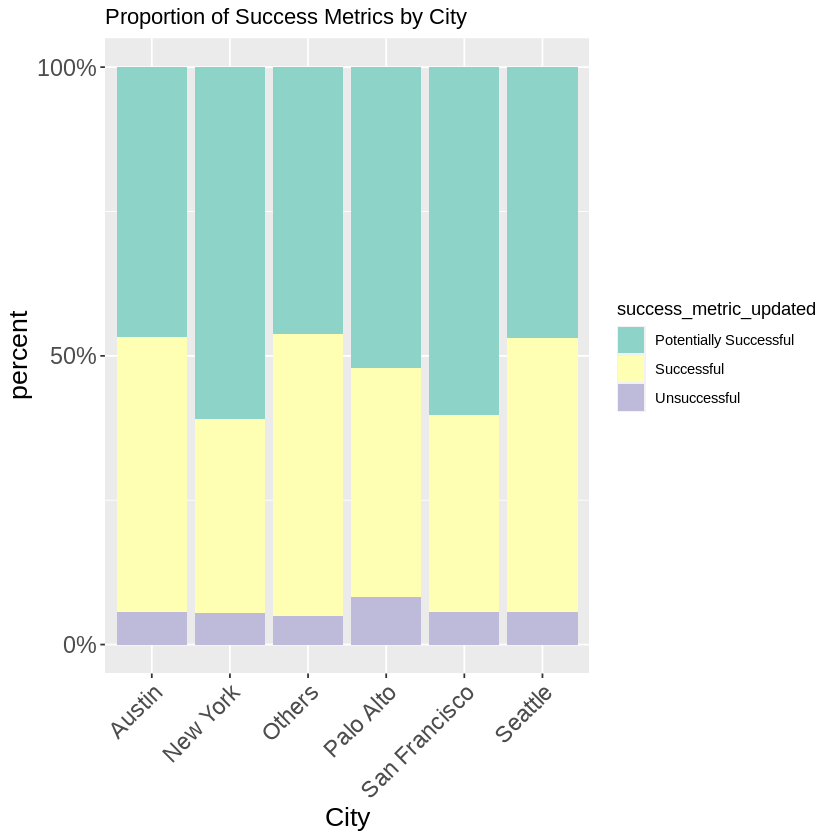

In [ ]:
library(ggplot2)

ggplot(df_us, aes(x = city, fill = success_metric_updated)) +
  geom_bar(stat = "count", position = "fill") +
  scale_fill_brewer(palette = "Set3") +
  scale_y_continuous(name = "percent",
                     breaks = c(0, 0.5, 1),
                     labels = scales::percent(c(0, 0.5, 1))) +
  labs(title = "Proportion of Success Metrics by City",
       x = "City",
       y = "Proportion") +
  # Increase font size and rotate x-axis labels
  theme(axis.text = element_text(size = 14),  # Change 14 to your desired size
        axis.title = element_text(size = 16),  # Change 16 to your desired size
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels



In [ ]:
df_us_new$success_metric_updated[df_us$success_metric_updated == 'Potentially Successful'] <- 'Unsuccessful'

In [ ]:
df_us_new <- df_us_new[c("city", "success_metric_updated")]
head(df_us_new)

,city,success_metric_updated
,<chr>,<chr>
1,New York,Successful
2,Others,Unsuccessful
3,Others,Unsuccessful
4,Others,Successful
5,Others,Successful
6,Others,Unsuccessful


In [ ]:
tbl2 <- table(df_us_new$city,df_us_new$success_metric_updated)
tbl2

               
                Successful Unsuccessful
  Austin               220          242
  New York             655         1296
  Others              8118         8500
  Palo Alto            192          292
  San Francisco        756         1463
  Seattle              213          235

In [ ]:
cramer_v <- cramersV(tbl2)

cat("Cramer's V:", cramer_v)

Cramer's V: 0.1184705

In [ ]:
tbl_prop2 <- prop.table(tbl2, 1)
tbl_prop2

               
                Successful Unsuccessful
  Austin         0.4761905    0.5238095
  New York       0.3357253    0.6642747
  Others         0.4885064    0.5114936
  Palo Alto      0.3966942    0.6033058
  San Francisco  0.3406940    0.6593060
  Seattle        0.4754464    0.5245536

In [ ]:
chisq.test(tbl2)


	Pearson's Chi-squared test

data:  tbl2
X-squared = 311.33, df = 5, p-value < 2.2e-16


In [ ]:
# Create a new data frame with the "Others" category
df_us_new_merge <- df[c("city", "success_metric_updated")]
df_us_new_merge$city[!(df_us_new_merge$city %in% c("Seattle", "Others"))] <- "Others"

# Create a new table with the updated data frame
tbl_us_merge <- table(df_us_new_merge$city, df_us_new_merge$success_metric_updated)

tbl_us_merge

         
          Potentially Successful Successful Unsuccessful
  Others                   16791      13849         1677
  Seattle                    210        213           25

In [ ]:
# Subset data for US and Others
seattle_data <- df_us_new_merge[df_us_new_merge$city == "Seattle", ]
other_data <- df_us_new_merge[df_us_new_merge$city != "Seattle", ]

# Calculate success proportions for each group
p_sea <- sum(seattle_data$success_metric_updated == "Successful") / nrow(seattle_data)
p_other <- sum(other_data$success_metric_updated == "Successful") / nrow(other_data)

# Calculate pooled proportion (assuming equal variances)
pooled_p <- (sum(seattle_data$success_metric_updated == "Successful") + sum(other_data$success_metric_updated == "Successful")) / (nrow(seattle_data) + nrow(other_data))

# Calculate standard error for the difference in proportions
se_diff <- sqrt(pooled_p * (1 - pooled_p) * (1/nrow(seattle_data) + 1/nrow(other_data)))

# Calculate the z-statistic
z_stat <- (p_sea - p_other) / se_diff

# Interpretation
# A p-value less than the chosen significance level 0.05 indicates
# a statistically significant difference between the success proportions
# in US and Others category.


In [ ]:

# Confidence level (e.g., 95%)
confidence_level <- 0.95

# Critical value (one-tailed) from standard normal distribution table for confidence level
z_crit <- qnorm(1 - (1 - confidence_level) / 2, mean = 0, sd = 1)

# Confidence interval for the difference in proportions
lower_bound <- (p_sea - p_other) - z_crit * se_diff
upper_bound <- (p_sea - p_other) + z_crit * se_diff

# Interpretation
# Report the z-statistic, p-value, and confidence interval.
# The confidence interval captures the range of plausible values for the true
# difference in success proportions between US and Others with a confidence level
# of (e.g.,) 95%.

cat("z-statistic:", z_stat, "\n")
cat("p-value (two-tailed):", 2 * pnorm(-abs(z_stat), mean = 0, sd = 1, lower.tail = TRUE), "\n")
cat("Confidence Interval (", confidence_level * 100, "%):", lower_bound, " - ", upper_bound, "\n")


z-statistic: 1.992275 
p-value (two-tailed): 0.04634092 
Confidence Interval ( 95 %): 0.0007607936  -  0.09305993 


# Additional analysis: Logistic Regression

## Country level analysis

In [ ]:
df_new$success_metric_updated <- as.numeric(df_new$success_metric_updated == "Successful")

In [ ]:
df_new <- within(df_new,relevel(factor(country),ref = "Others"))
head(df_new)

,country,success_metric_updated
,<chr>,<dbl>
1,United States,1
2,Others,0
3,United Kingdom,0
4,United States,0
5,United States,0
6,Others,0


In [ ]:
model <- glm(success_metric_updated ~ country , data = df_new, family = "binomial")
summary(model)


Call:
glm(formula = success_metric_updated ~ country, family = "binomial", 
    data = df_new)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.29783    0.06286  -4.738 2.16e-06 ***
countryGermany        -0.16658    0.10002  -1.665 0.095841 .  
countryIndia          -0.35827    0.10419  -3.439 0.000584 ***
countryOthers         -0.30605    0.06807  -4.496 6.92e-06 ***
countryUnited Kingdom -0.12250    0.07923  -1.546 0.122091    
countryUnited States   0.12846    0.06429   1.998 0.045681 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 44762  on 32764  degrees of freedom
Residual deviance: 44502  on 32759  degrees of freedom
AIC: 44514

Number of Fisher Scoring iterations: 4


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘Rcpp’, ‘RcppEigen’, ‘RcppArmadillo’, ‘lme4’, ‘survey’


Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



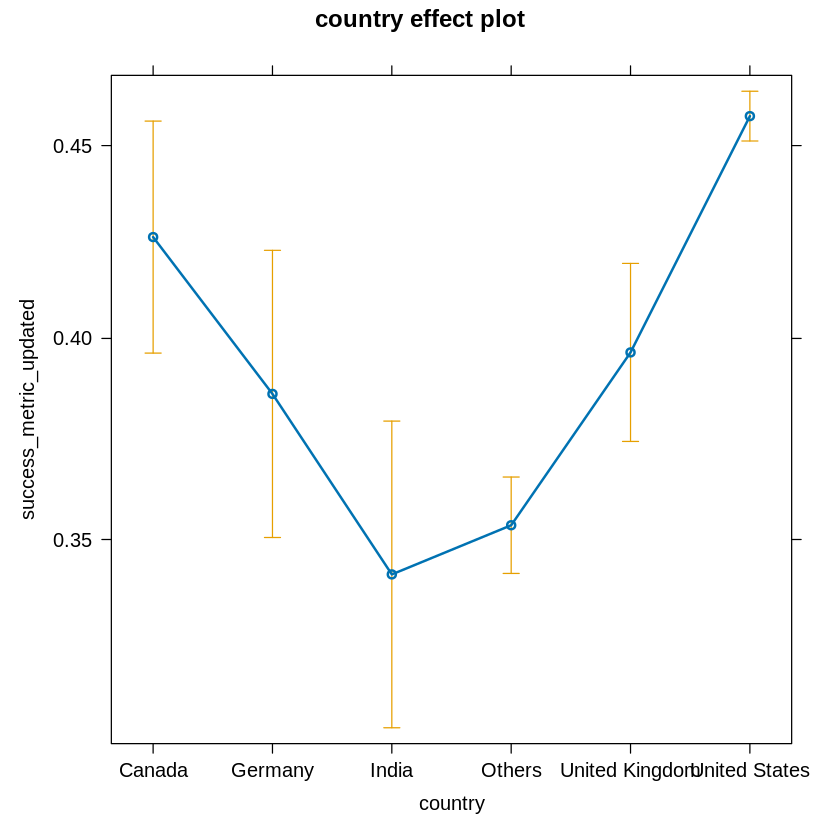

In [ ]:
install.packages("effects")
library("effects")
plot(Effect('country', model), confint=T)


In [ ]:
# Get the estimated coefficients
coefs <- coef(model, simplify=TRUE)

# Calculate odds ratios for each country compared to the reference category
odds_ratios <- as.data.frame(exp(coefs))
odds_ratios

,exp(coefs)
,<dbl>
(Intercept),0.7424242
countryGermany,0.8465573
countryIndia,0.6988833
countryOthers,0.7363482
countryUnited Kingdom,0.8847052
countryUnited States,1.1370815


## City level analysis

In [ ]:
df_us_new <- within(df_us_new,relevel(factor(city),ref = "Others"))

In [ ]:
library(nnet)
df_us_new$city <- as.factor(df_us_new$city)
df_relevel_us <- df_us_new %>%
  mutate(city = relevel(city, ref = "Seattle"))
model2 <- multinom(success_metric_updated ~ city, data = df_relevel_us)
summary(model2)

# weights:  21 (12 variable)
initial  value 24369.417787 
iter  10 value 19713.217618
iter  20 value 18922.967683
final  value 18922.965134 
converged


Call:
multinom(formula = success_metric_updated ~ city, data = df_relevel_us)

Coefficients:
             (Intercept) cityAustin cityNew York  cityOthers cityPalo Alto
Successful    0.01419343 0.00413913   -0.6112531  0.04192902    -0.2860865
Unsuccessful -2.12808318 0.01118418   -0.2900717 -0.10224037     0.2877459
             citySan Francisco
Successful          -0.5835821
Unsuccessful        -0.2251744

Std. Errors:
             (Intercept) cityAustin cityNew York cityOthers cityPalo Alto
Successful    0.09724617  0.1364993    0.1087376 0.09854082     0.1365046
Unsuccessful  0.21155737  0.2963733    0.2345844 0.21470660     0.2715151
             citySan Francisco
Successful           0.1073688
Unsuccessful         0.2310392

Residual Deviance: 37845.93 
AIC: 37869.93 

In [ ]:
df_us_new$success_metric_updated <- as.numeric(df_us_new$success_metric_updated == "Successful")

In [ ]:
model2 <- glm(success_metric_updated ~ city, data = df_us_new, family = "binomial")
summary(model2)


Call:
glm(formula = success_metric_updated ~ city, family = "binomial", 
    data = df_us_new)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.095310   0.093154  -1.023   0.3062    
cityNew York      -0.587092   0.104766  -5.604 2.10e-08 ***
cityOthers         0.049328   0.094438   0.522   0.6014    
cityPalo Alto     -0.323948   0.131570  -2.462   0.0138 *  
citySan Francisco -0.564893   0.103363  -5.465 4.63e-08 ***
citySeattle       -0.002983   0.132770  -0.022   0.9821    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 30592  on 22181  degrees of freedom
Residual deviance: 30275  on 22176  degrees of freedom
AIC: 30287

Number of Fisher Scoring iterations: 4


In [ ]:
# Get the estimated coefficients
coefs <- coef(model2, simplify=TRUE)

# Calculate odds ratios for each country compared to the reference category
odds_ratios <- as.data.frame(exp(coefs))
odds_ratios

,exp(coefs)
,<dbl>
(Intercept),0.9090909
cityNew York,0.5559414
cityOthers,1.0505647
cityPalo Alto,0.7232877
citySan Francisco,0.5684211
citySeattle,0.9970213


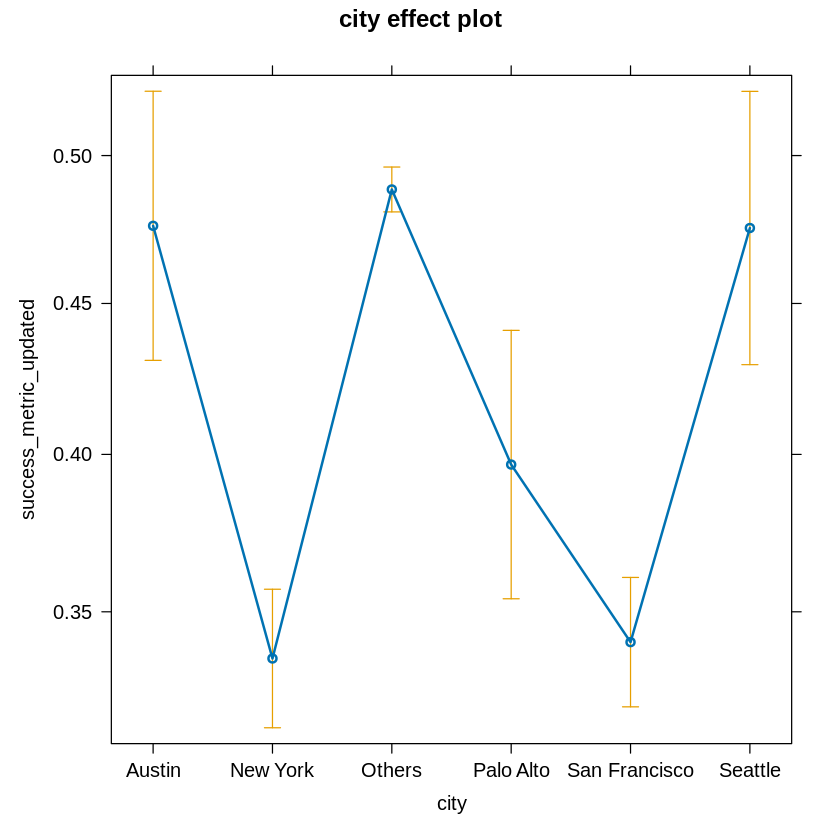

In [ ]:
library("effects")
plot(Effect('city', model2), confint=T)